## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

In [84]:
!pip install feature_engine

  Using cached feature_engine-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached packaging-24.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached feature_engine-1.7.0-py2.py3-none-any.whl (344 kB)
Using cached pandas-2

## 2. Display Settings

In [3]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output="pandas")
warnings.filterwarnings("ignore")

## 3. Read the Data

In [4]:
path = r"C:\Users\KIIT\sage\data\train.csv"

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2.0,No Info,9483
1,Jet Airways,2019-06-06,Delhi,Cochin,19:15:00,04:25:00,550,1.0,No Info,14714
2,Multiple Carriers,2019-06-01,Delhi,Cochin,11:40:00,19:00:00,440,1.0,No Info,12524
3,Jet Airways,2019-05-01,Kolkata,Banglore,06:30:00,12:00:00,330,1.0,No Info,14388
4,Spicejet,2019-05-15,Mumbai,Hyderabad,22:45:00,00:15:00,90,0.0,No check-in baggage included,1965
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-21,Delhi,Cochin,06:40:00,18:50:00,730,1.0,No Info,13568
636,Air India,2019-05-09,Delhi,Cochin,13:00:00,19:15:00,375,1.0,No Info,8372
637,Jet Airways,2019-06-27,Banglore,Delhi,11:10:00,14:05:00,175,0.0,No Info,8016
638,Jet Airways,2019-05-06,Banglore,Delhi,18:55:00,22:00:00,185,0.0,No Info,7229


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [6]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

## 4. Transformation Operations

## 4.1 airline

In [7]:
X_train.airline

0            Jet Airways
1            Jet Airways
2      Multiple Carriers
3            Jet Airways
4               Spicejet
             ...        
635    Multiple Carriers
636            Air India
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [8]:
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])#.airline.value_counts()

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0
636,1.0,0.0,0.0,0.0,0.0
637,0.0,0.0,1.0,0.0,0.0
638,0.0,0.0,1.0,0.0,0.0


## 4.2 date_of_journey

In [9]:
X_train.date_of_journey

0      2019-04-09
1      2019-06-06
2      2019-06-01
3      2019-05-01
4      2019-05-15
          ...    
635    2019-03-21
636    2019-05-09
637    2019-06-27
638    2019-05-06
639    2019-06-06
Name: date_of_journey, Length: 640, dtype: object

In [10]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.333333,0.352941,0.166667,0.330508
1,1.000000,0.823529,0.500000,0.822034
2,1.000000,0.764706,0.833333,0.779661
3,0.666667,0.529412,0.333333,0.516949
4,0.666667,0.647059,0.333333,0.635593
...,...,...,...,...
635,0.000000,0.176471,0.500000,0.169492
636,0.666667,0.588235,0.500000,0.584746
637,1.000000,1.000000,0.500000,1.000000
638,0.666667,0.588235,0.000000,0.559322


## 4.3 source & destination

In [11]:
X_train.source

0         Delhi
1         Delhi
2         Delhi
3       Kolkata
4        Mumbai
         ...   
635       Delhi
636       Delhi
637    Banglore
638    Banglore
639       Delhi
Name: source, Length: 640, dtype: object

In [12]:
X_train.destination

0         Cochin
1         Cochin
2         Cochin
3       Banglore
4      Hyderabad
         ...    
635       Cochin
636       Cochin
637        Delhi
638        Delhi
639       Cochin
Name: destination, Length: 640, dtype: object

In [13]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Delhi,Cochin
1,Delhi,Cochin
2,Delhi,Cochin
3,Kolkata,Banglore
4,Mumbai,Hyderabad
...,...,...
635,Delhi,Cochin
636,Delhi,Cochin
637,Banglore,Delhi
638,Banglore,Delhi


In [14]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2))
	# ("encoder", MeanEncoder()),
	# ("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,Delhi,Cochin
1,Delhi,Cochin
2,Delhi,Cochin
3,Kolkata,Banglore
4,Other,Other
...,...,...
635,Delhi,Cochin
636,Delhi,Cochin
637,Banglore,Delhi
638,Banglore,Delhi


In [22]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-1.859618,-1.614854
1,-0.123273,-0.186337
2,0.982664,0.480133
3,0.982664,0.480133
4,0.982664,0.480133
...,...,...
635,-0.123273,-0.186337
636,0.982664,0.480133
637,-1.022447,-1.695984
638,-1.022447,-1.695984


In [15]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [16]:
def is_north(X):
	columns = X.columns.to_list()
	north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)


FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
635,1,0
636,1,0
637,0,1
638,0,1


In [51]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,Delhi,Cochin,1,0
1,Delhi,Cochin,1,0
2,Delhi,Cochin,1,0
3,Kolkata,Banglore,1,0
4,Other,Other,1,0
...,...,...,...,...
635,Delhi,Cochin,1,0
636,Delhi,Cochin,1,0
637,Banglore,Delhi,0,1
638,Banglore,Delhi,0,1


## 4.4 dep_time & arrival_time

In [52]:
X_train.dep_time

0      23:05:00
1      19:15:00
2      11:40:00
3      06:30:00
4      22:45:00
         ...   
635    06:40:00
636    13:00:00
637    11:10:00
638    18:55:00
639    14:00:00
Name: dep_time, Length: 640, dtype: object

In [53]:
X_train.arrival_time

0      19:00:00
1      04:25:00
2      19:00:00
3      12:00:00
4      00:15:00
         ...   
635    18:50:00
636    19:15:00
637    14:05:00
638    22:00:00
639    04:25:00
Name: arrival_time, Length: 640, dtype: object

In [54]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,23:05:00,19:00:00
1,19:15:00,04:25:00
2,11:40:00,19:00:00
3,06:30:00,12:00:00
4,22:45:00,00:15:00
...,...,...
635,06:40:00,18:50:00
636,13:00:00,19:15:00
637,11:10:00,14:05:00
638,18:55:00,22:00:00


In [55]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,1.000000,0.090909,0.826087,0.000000
1,0.826087,0.272727,0.173913,0.454545
2,0.478261,0.727273,0.826087,0.000000
3,0.260870,0.545455,0.521739,0.000000
4,0.956522,0.818182,0.000000,0.272727
...,...,...,...,...
635,0.260870,0.727273,0.782609,0.909091
636,0.565217,0.000000,0.826087,0.272727
637,0.478261,0.181818,0.608696,0.090909
638,0.782609,1.000000,0.956522,0.000000


In [56]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,night,evening
1,evening,morning
2,morning,evening
3,morning,afternoon
4,night,night
...,...,...
635,morning,evening
636,afternoon,evening
637,morning,afternoon
638,evening,night


In [57]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.152893,0.561224
1,0.219008,0.887755
2,1.000000,0.561224
3,1.000000,0.000000
4,0.152893,1.000000
...,...,...
635,1.000000,0.561224
636,0.000000,0.561224
637,1.000000,0.000000
638,0.219008,1.000000


In [58]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.090909,0.826087,0.000000,0.152893,0.561224
1,0.826087,0.272727,0.173913,0.454545,0.219008,0.887755
2,0.478261,0.727273,0.826087,0.000000,1.000000,0.561224
3,0.260870,0.545455,0.521739,0.000000,1.000000,0.000000
4,0.956522,0.818182,0.000000,0.272727,0.152893,1.000000
...,...,...,...,...,...,...
635,0.260870,0.727273,0.782609,0.909091,1.000000,0.561224
636,0.565217,0.000000,0.826087,0.272727,0.000000,0.561224
637,0.478261,0.181818,0.608696,0.090909,1.000000,0.000000
638,0.782609,1.000000,0.956522,0.000000,0.219008,1.000000


## 4.5 duration

In [59]:
X_train.duration

0      1195
1       550
2       440
3       330
4        90
       ... 
635     730
636     375
637     175
638     185
639     865
Name: duration, Length: 640, dtype: int64

In [60]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[170.],
       [520.],
       [940.]])

In [61]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [62]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,1.109704e-195,0.904837,0.904837
1,0.000000e+00,0.000000e+00,1.000000,1.000000
2,0.000000e+00,0.000000e+00,1.000000,1.000000
3,1.000000e+00,0.000000e+00,1.000000,1.000000
4,0.000000e+00,0.000000e+00,0.904837,0.904837
...,...,...,...,...
635,0.000000e+00,0.000000e+00,1.000000,1.000000
636,1.135971e-88,0.000000e+00,1.000000,1.000000
637,0.000000e+00,0.000000e+00,0.904837,0.904837
638,0.000000e+00,0.000000e+00,0.904837,0.904837


In [63]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [64]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [65]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.362366,-0.112592,-0.105763,2.0,1,1.063078
1,-0.362366,-0.112592,-0.105763,2.0,0,-0.182490
2,-0.362366,-0.112592,-0.105763,2.0,0,-0.394913
3,-0.362366,-0.112592,-0.105763,1.0,0,-0.607335
4,-0.362366,-0.112592,-0.105763,0.0,0,-1.070802
...,...,...,...,...,...,...
635,-0.362366,-0.112592,-0.105763,2.0,0,0.165110
636,-0.362366,-0.112592,-0.105763,1.0,0,-0.520435
637,2.469626,-0.112592,-0.105763,0.0,0,-0.906658
638,-0.362366,-0.112592,-0.105763,1.0,0,-0.887347


## 4.6 total_stops

In [66]:
X_train.total_stops

0      2.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
635    1.0
636    1.0
637    0.0
638    0.0
639    1.0
Name: total_stops, Length: 640, dtype: float64

In [67]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,2.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,0.0,1
...,...,...
635,1.0,0
636,1.0,0
637,0.0,1
638,0.0,1


## 4.7 additional_info

In [68]:
X_train.additional_info

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4      No check-in baggage included
                   ...             
635                         No Info
636                         No Info
637                         No Info
638                         No Info
639     In-flight meal not included
Name: additional_info, Length: 640, dtype: object

In [69]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [70]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [71]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [72]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,0.0,1.0,1
...,...,...,...,...
635,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


## 4.8 Column Transformer

In [73]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.333333,0.352941,0.166667,0.330508,Delhi,Cochin,1,0,1.000000,0.090909,0.826087,0.000000,0.152893,0.561224,-0.362366,-0.112592,-0.105763,2.0,1,1.063078,2.0,0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,1.000000,0.823529,0.500000,0.822034,Delhi,Cochin,1,0,0.826087,0.272727,0.173913,0.454545,0.219008,0.887755,-0.362366,-0.112592,-0.105763,2.0,0,-0.182490,1.0,0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,1.000000,0.764706,0.833333,0.779661,Delhi,Cochin,1,0,0.478261,0.727273,0.826087,0.000000,1.000000,0.561224,-0.362366,-0.112592,-0.105763,2.0,0,-0.394913,1.0,0,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,Kolkata,Banglore,1,0,0.260870,0.545455,0.521739,0.000000,1.000000,0.000000,-0.362366,-0.112592,-0.105763,1.0,0,-0.607335,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.666667,0.647059,0.333333,0.635593,Other,Other,1,0,0.956522,0.818182,0.000000,0.272727,0.152893,1.000000,-0.362366,-0.112592,-0.105763,0.0,0,-1.070802,0.0,1,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0,0.000000,0.176471,0.500000,0.169492,Delhi,Cochin,1,0,0.260870,0.727273,0.782609,0.909091,1.000000,0.561224,-0.362366,-0.112592,-0.105763,2.0,0,0.165110,1.0,0,0.0,1.0,0.0,0
636,1.0,0.0,0.0,0.0,0.0,0.666667,0.588235,0.500000,0.584746,Delhi,Cochin,1,0,0.565217,0.000000,0.826087,0.272727,0.000000,0.561224,-0.362366,-0.112592,-0.105763,1.0,0,-0.520435,1.0,0,0.0,1.0,0.0,0
637,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.500000,1.000000,Banglore,Delhi,0,1,0.478261,0.181818,0.608696,0.090909,1.000000,0.000000,2.469626,-0.112592,-0.105763,0.0,0,-0.906658,0.0,1,0.0,1.0,0.0,0
638,0.0,0.0,1.0,0.0,0.0,0.666667,0.588235,0.000000,0.559322,Banglore,Delhi,0,1,0.782609,1.000000,0.956522,0.000000,0.219008,1.000000,-0.362366,-0.112592,-0.105763,1.0,0,-0.887347,0.0,1,0.0,1.0,0.0,0


## 5. Feature Selection

In [79]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

## 6. Putting it all Together

In [80]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__duration_cat,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.352941,0.330508,Delhi,Cochin,2.0,1.063078,2.0,0
1,0.0,1.0,0.0,0.823529,0.822034,Delhi,Cochin,2.0,-0.182490,1.0,0
2,0.0,0.0,0.0,0.764706,0.779661,Delhi,Cochin,2.0,-0.394913,1.0,0
3,0.0,1.0,0.0,0.529412,0.516949,Kolkata,Banglore,1.0,-0.607335,1.0,0
4,0.0,0.0,1.0,0.647059,0.635593,Other,Other,0.0,-1.070802,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.176471,0.169492,Delhi,Cochin,2.0,0.165110,1.0,0
636,0.0,0.0,0.0,0.588235,0.584746,Delhi,Cochin,1.0,-0.520435,1.0,0
637,0.0,1.0,0.0,1.000000,1.000000,Banglore,Delhi,0.0,-0.906658,0.0,1
638,0.0,1.0,0.0,0.588235,0.559322,Banglore,Delhi,1.0,-0.887347,0.0,1


## 7. Visualizations

In [81]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.014811692620892472,
 'air__airline_Indigo': 0.10475042575825448,
 'air__airline_Jet Airways': 0.20266156257480142,
 'air__airline_Multiple Carriers': 0.014284286519605782,
 'air__airline_Other': 0.1363577275909518,
 'doj__date_of_journey_month': 0.08207950363091039,
 'doj__date_of_journey_week': 0.2084824207441303,
 'doj__date_of_journey_day_of_week': -0.024685994883892375,
 'doj__date_of_journey_day_of_year': 0.23405233397068928,
 'location__source_is_north': 0.016391004286895994,
 'location__destination_is_north': 0.016391004286895994,
 'time__dep_time_hour': -0.05588371442861847,
 'time__dep_time_minute': -0.01627478111662343,
 'time__arrival_time_hour': 0.0676067127353251,
 'time__arrival_time_minute': -0.0157340313073564,
 'time__dep_time_part_of_day': -0.02181111359934514,
 'time__arrival_time_part_of_day': 0.006051881703636575,
 'dur__duration_rbf_25': 0.09377097904229607,
 'dur__duration_rbf_50': -0.003038762322981836,
 'dur__duration_rbf_75': -0.0

In [77]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_hour': -0.05588371442861847,
 'doj__date_of_journey_day_of_week': -0.024685994883892375,
 'time__dep_time_part_of_day': -0.02181111359934514,
 'info__additional_info_No Info': -0.021538222118413497,
 'info__additional_info': -0.021538222118413497,
 'time__dep_time_minute': -0.01627478111662343,
 'time__arrival_time_minute': -0.0157340313073564,
 'air__airline_Air India': -0.014811692620892472,
 'info__additional_info_In-flight meal not included': -0.00807786856153995,
 'dur__duration_rbf_75': -0.006825594567062591,
 'dur__duration_rbf_50': -0.003038762322981836,
 'time__arrival_time_part_of_day': 0.006051881703636575,
 'air__airline_Multiple Carriers': 0.014284286519605782,
 'location__source_is_north': 0.016391004286895994,
 'location__destination_is_north': 0.016391004286895994,
 'info__additional_info_Other': 0.02784616021725687,
 'dur__duration_over_1000': 0.06170091926964668,
 'time__arrival_time_hour': 0.0676067127353251,
 'doj__date_of_journey_month': 0.08207950

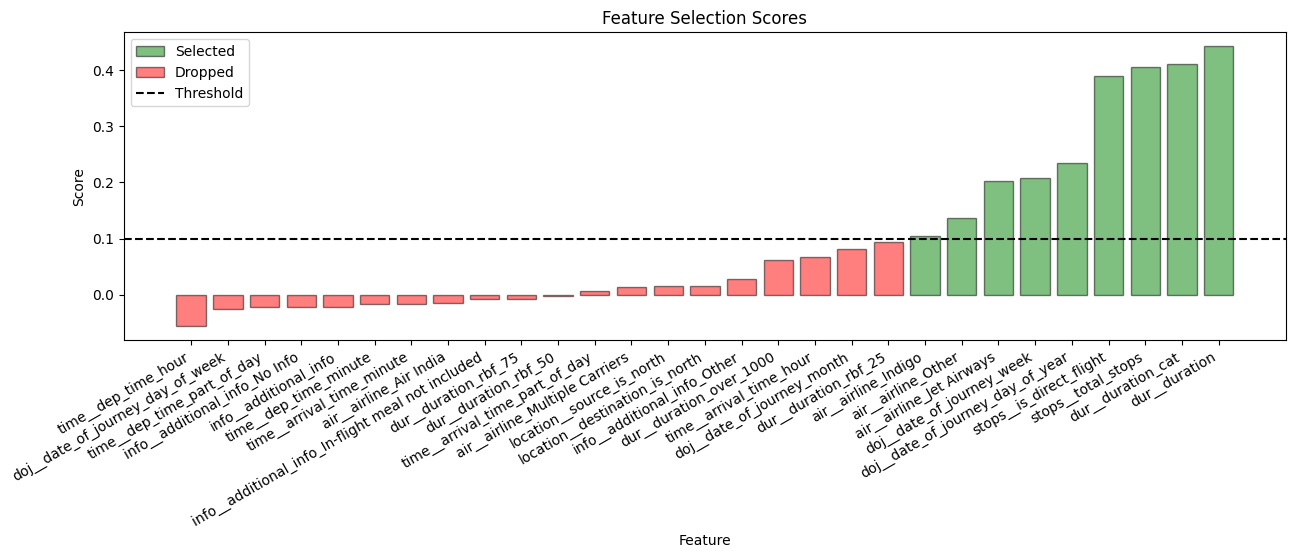

In [83]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
    rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()